# Ashvika Venkatesan


### <font color=red> *Stock Market Prediction using Numerical Analysis* </font>
### <font color=red> *& Sentimental Analysis of Text* </font>

In [1]:
import pandas as pd
import numpy as np
import re,nltk
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
news_headlines=pd.read_csv("india-news-headlines.csv")

In [3]:
news_headlines.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
news_headlines.rename(columns={"publish_date":"Date"}, inplace=True)

In [5]:
news_headlines.dtypes

Date                  int64
headline_category    object
headline_text        object
dtype: object

In [6]:
news_headlines["Date"]=pd.to_datetime(news_headlines["Date"], format="%Y%m%d")
news_headlines.dtypes

Date                 datetime64[ns]
headline_category            object
headline_text                object
dtype: object

In [7]:
hist_stock=pd.read_csv("^BSESN.csv")
hist_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0
1,2015-11-17,25897.880859,25948.199219,25732.789063,25864.470703,25864.470703,10700.0
2,2015-11-18,25837.710938,25890.359375,25453.320313,25482.519531,25482.519531,16100.0
3,2015-11-19,25640.339844,25884.519531,25603.099609,25841.919922,25841.919922,9900.0
4,2015-11-20,25856.130859,26058.759766,25769.810547,25868.490234,25868.490234,10000.0


In [8]:
hist_stock.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [9]:
hist_stock["Date"]=pd.to_datetime(hist_stock["Date"], format="%Y-%m-%d")
hist_stock.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [10]:
merge=hist_stock.merge(news_headlines, how="inner", on="Date", left_index=True)
merge.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text
2226920,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,life-style.health-fitness.diet,5 must-have nutrients for women's health
2226921,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,unknown,Sridevi: Rare images that should not be missed
2226922,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,unknown,Tennis: ATP World Tour Finals
2226923,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,entertainment.marathi.movies.news,Mrunmayee Deshpande turns debutant director
2226924,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,entertainment.marathi.movies.news,Sonali Bendre wants to make a comeback to Mara...


In [11]:
merge.drop(columns={"headline_category"},axis=1,inplace=True)
merge.reset_index(drop=True)

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text
0,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,5 must-have nutrients for women's health
1,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,Sridevi: Rare images that should not be missed
2,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,Tennis: ATP World Tour Finals
3,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,Mrunmayee Deshpande turns debutant director
4,2015-11-16,25580.150391,25866.419922,25451.419922,25760.099609,25760.099609,11300.0,Sonali Bendre wants to make a comeback to Mara...
...,...,...,...,...,...,...,...,...
721427,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0,why tiktok removed 1 65 crore videos in india
721428,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0,apurva asrani calls alia bhatts mother soni ra...
721429,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0,kangana ranaut gets a doll version of herself ...
721430,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0,meezaan jaffrey reminisces his childhood days ...


In [12]:
#Combine all headlines on the same date into one.

foo = lambda a: " ".join(a) 
merge=merge.groupby(by='Date').agg({'headline_text':foo,
                              'Open': 'mean',
                              'High': 'mean',
                              'Low':'mean',
                              'Close':'mean'}).reset_index()
merge.head()

,Date,headline_text,Open,High,Low,Close
0,2015-11-16,5 must-have nutrients for women's health Sride...,25580.150391,25866.419922,25451.419922,25760.099609
1,2015-11-17,How healthy is your fridge (Quiz) The curious ...,25897.880859,25948.199219,25732.789063,25864.470703
2,2015-11-18,Most talked about celebrity divorces ISL: Kolk...,25837.710938,25890.359375,25453.320313,25482.519531
3,2015-11-19,International Men's Day: 7 things men are so p...,25640.339844,25884.519531,25603.099609,25841.919922
4,2015-11-20,Food items to keep away from your toddler Shou...,25856.130859,26058.759766,25769.810547,25868.490234


In [13]:
len(merge)

1137

In [14]:
merge.iloc[1,1]

"How healthy is your fridge (Quiz) The curious case of Bollywood names 9 signs that spell cancer! RAKSHA PRABHAKAR Contour your face with threads PIC: Sonam Kapoor with family DIET: Top 10 healing foods for a sore throat HEALTH: Myths about age and pregnancy Move over lumbersexual; the 'dandy wildman' is here Feeling dizzy? You may have 'cybersickness' Short film inspired by Bina Kalindi's life in KIFF Vikas Khanna's new storybook for kids Amala Paul signs a romcom I eat everything in moderation Manisha's compliment boosted the dancer in me Hindi TV shows grab international eyeballs Soul Curry: I am so glad he left me Taxi drivers to protest outside police stations today Shyam Ambardar Pushp Sobti Shri Harish Chander Dandona Shri.Bimal Kishore Jain & Smt.Jaiwanti Devi Jain SMT. SAROJ RANI WADHWA Brig SP Sengupta MRS. HARMOHINDER KAUR CHATRATH RITA MADAN SMT. JANAK KAMPANI Smt. Satyawati Uppal Stop ugly constructions around Taj Mahal; Supreme Court tells Uttar Pradesh government Proposa

In [15]:
#Adding label to stock data

prev=merge["Close"][0]
Label=[1]
for i in range(1, len(merge['Close'])):
    if merge["Close"][i]>=prev:
        Label.append(1)
    else:
        Label.append(0)
    prev= merge["Close"][i]

In [16]:
merge["Label"]=Label
merge.head(7)

,Date,headline_text,Open,High,Low,Close,Label
0,2015-11-16,5 must-have nutrients for women's health Sride...,25580.150391,25866.419922,25451.419922,25760.099609,1
1,2015-11-17,How healthy is your fridge (Quiz) The curious ...,25897.880859,25948.199219,25732.789063,25864.470703,1
2,2015-11-18,Most talked about celebrity divorces ISL: Kolk...,25837.710938,25890.359375,25453.320313,25482.519531,0
3,2015-11-19,International Men's Day: 7 things men are so p...,25640.339844,25884.519531,25603.099609,25841.919922,1
4,2015-11-20,Food items to keep away from your toddler Shou...,25856.130859,26058.759766,25769.810547,25868.490234,1
5,2015-11-23,10 herbs to battle diabetes 8 things you shoul...,25945.140625,25958.039063,25747.009766,25819.339844,0
6,2015-11-24,UEFA Champions League: Maccavi Tel-Aviv vs Che...,25785.609375,25901.560547,25703.859375,25775.740234,0


In [17]:
headlines = []
for row in range(0,len(merge.index)):
    headlines.append(merge.iloc[row,1])

In [18]:
headlines[0]

"5 must-have nutrients for women's health Sridevi: Rare images that should not be missed Tennis: ATP World Tour Finals Mrunmayee Deshpande turns debutant director Sonali Bendre wants to make a comeback to Marathi films 'Banglavil Outha' on TV Bobby Dhingra Mrs Nita Kawatra Late Rachel Tommy MTNL planning to launch free roaming service soon Popular films based on children's books Book review: Salim-Javed decoded! PIC: This is how Aaradhya celebrated Diwali Newly wed: Bindu Subramaniam & Sanjeev Nayak GV Prakash will be seen in an action avatar for Sam Anton's next Why do women lie while sexting? Seven more top actors to play cameo in Inji Iduppazhagi Lack of sleep could give you diabetes I want to act with Mohanlal : Siddhartha Lama Prithviraj has matured as an actor: Biju Menon Prayaga to slim down for her M-Town debut Make this season your healthiest with supplements 2015 is the year of the 'unusual' villain Cailin has fun at the Diwali get-together organised at the German Consulate; 

In [19]:
#Clean the data

clean_headlines = []
for i in range(0, len(headlines)):
    clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
    clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
    clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

In [20]:
merge['Combined_News'] = clean_headlines

In [21]:
#Checking if the headline text and the cleaned headlines are one and the same.

merge['Combined_News'] == merge["headline_text"]

0       False
1       False
2       False
3       False
4       False
        ...  
1132    False
1133    False
1134    False
1135    False
1136    False
Length: 1137, dtype: bool

### The subjectivity shows how subjective or objective a statement is.

### The polarity shows how positive/negative the statement is, a value equal to 1 means the statement is positive, a value equal to 0 means the statement is neutral and a value of -1 means the statement is negative.

In [22]:
# Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [23]:
# Create a function to get the polarity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [24]:
# Create two new columns 'Subjectivity' & 'Polarity'

merge['Subjectivity'] =merge['Combined_News'].apply(getSubjectivity)
merge['Polarity'] =merge['Combined_News'].apply(getPolarity)

In [25]:
#Create a function to get the sentiment scores (using Sentiment Intensity Analyzer)

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [26]:
#Get the sentiment scores for each day

compound = []
neg = []
neu = []
pos = []
SIA = 0

In [27]:
for i in range(0, len(merge['Combined_News'])):
    SIA = getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [28]:
#Store the sentiment scores in the data frame

merge['Compound'] =compound
merge['Negative'] =neg
merge['Neutral'] =neu
merge['Positive'] =pos

In [29]:
keep_columns = [ 'Open', 'High', 'Low', 'Close', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive', 'Label']
df = pd.DataFrame(merge[keep_columns])
df

,Open,High,Low,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
0,25580.150391,25866.419922,25451.419922,25760.099609,0.394830,0.048730,-0.9999,0.186,0.695,0.119,1
1,25897.880859,25948.199219,25732.789063,25864.470703,0.428606,0.056071,-0.9998,0.151,0.741,0.108,1
2,25837.710938,25890.359375,25453.320313,25482.519531,0.372855,0.058173,-1.0000,0.182,0.714,0.105,0
3,25640.339844,25884.519531,25603.099609,25841.919922,0.413454,0.105078,-0.9994,0.144,0.732,0.124,1
4,25856.130859,26058.759766,25769.810547,25868.490234,0.427243,0.106915,-0.9951,0.114,0.780,0.106,1
...,...,...,...,...,...,...,...,...,...,...,...
1132,35679.738281,35706.550781,34794.929688,34868.980469,0.388562,0.088889,-0.9999,0.134,0.790,0.076,0
1133,34525.390625,35081.609375,34499.781250,34842.101563,0.403998,0.027038,-0.9999,0.140,0.800,0.060,0
1134,35144.781250,35254.878906,34910.339844,35171.269531,0.383265,0.072299,-0.9999,0.161,0.749,0.090,1
1135,34926.949219,35032.359375,34662.058594,34961.519531,0.395833,0.064768,-0.9999,0.141,0.774,0.085,0


In [30]:
#Create the feature data set
X = df
X = np.array(X.drop(['Label'],1))

#Create the target data set
y = np.array(df['Label'])

In [31]:
#Split the data into 80% training and 20% testing data sets

import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [33]:
x_train.shape , y_train.shape

((909, 10), (909,))

In [32]:
np.argwhere(np.isnan(x_train)), np.argwhere(np.isnan(y_train))

(array([[348,   0],
        [348,   1],
        [348,   2],
        [348,   3],
        [538,   0],
        [538,   1],
        [538,   2],
        [538,   3],
        [587,   0],
        [587,   1],
        [587,   2],
        [587,   3],
        [801,   0],
        [801,   1],
        [801,   2],
        [801,   3]], dtype=int32),
 array([], shape=(0, 1), dtype=int32))

In [34]:
x_train=x_train[~np.isnan(x_train).any(axis=1)]
y_train = np.delete(y_train, [348, 538, 587, 801])

In [35]:
x_train.shape, y_train.shape, np.any(np.isnan(x_train)), np.any(np.isnan(y_train))

((905, 10), (905,), False, False)

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [37]:
#Get the models predictions/classification

predictions = model.predict(x_test)
predictions

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [38]:
#Show the models metrics


print( sklearn.metrics.classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.95      0.68      0.80       123
           1       0.72      0.96      0.82       105

    accuracy                           0.81       228
   macro avg       0.84      0.82      0.81       228
weighted avg       0.85      0.81      0.81       228



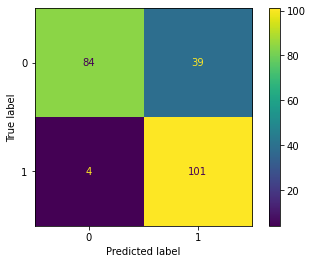

In [40]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test)  